In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [2]:
dataset = '../model/landmarks_dataset.csv'

In [3]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, 43)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.8, random_state=42)

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((42, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(40, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 50)                2150      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 40)                2040      
                                                                 
 dense_2 (Dense)             (None, 3)                 123       
                                                                 
Total params: 4313 (16.85 KB)
Trainable params: 4313 (16.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_test, y_test),
)

Epoch 1/100
11/11 [==============================] - 0s 10ms/step - loss: 1.0889 - accuracy: 0.3856 - val_loss: 1.0162 - val_accuracy: 0.5351
Epoch 2/100
11/11 [==============================] - 0s 2ms/step - loss: 0.9782 - accuracy: 0.5389 - val_loss: 0.9465 - val_accuracy: 0.5351
Epoch 3/100
11/11 [==============================] - 0s 2ms/step - loss: 0.9291 - accuracy: 0.5843 - val_loss: 0.9092 - val_accuracy: 0.5322
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.9095 - accuracy: 0.5924 - val_loss: 0.8728 - val_accuracy: 0.5789
Epoch 5/100
11/11 [==============================] - 0s 13ms/step - loss: 0.8656 - accuracy: 0.6342 - val_loss: 0.8374 - val_accuracy: 0.6404
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.8464 - accuracy: 0.6386 - val_loss: 0.7996 - val_accuracy: 0.6608
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.8082 - accuracy: 0.6782 - val_loss: 0.7515 - val_accuracy: 0.7544
Epoch 8/100

In [9]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 [==============================] - 0s 958us/step - loss: 0.1535 - accuracy: 0.9678


In [10]:
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 40ms/step
[0.00128788 0.8025172  0.19619487]
1


11/11 [==============================] - 0s 404us/step


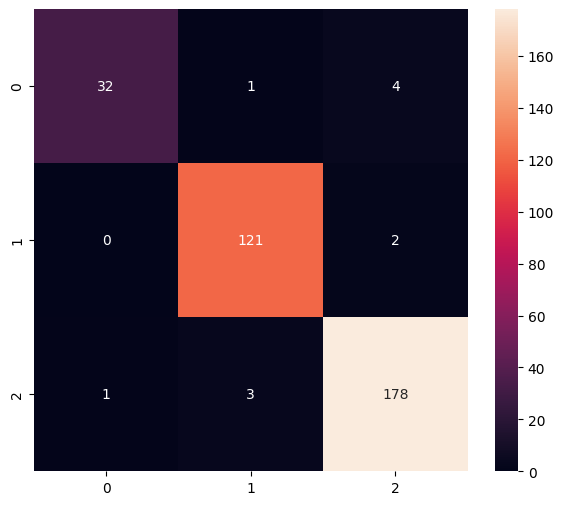

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.86      0.91        37
           1       0.97      0.98      0.98       123
           2       0.97      0.98      0.97       182

    accuracy                           0.97       342
   macro avg       0.97      0.94      0.95       342
weighted avg       0.97      0.97      0.97       342



In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

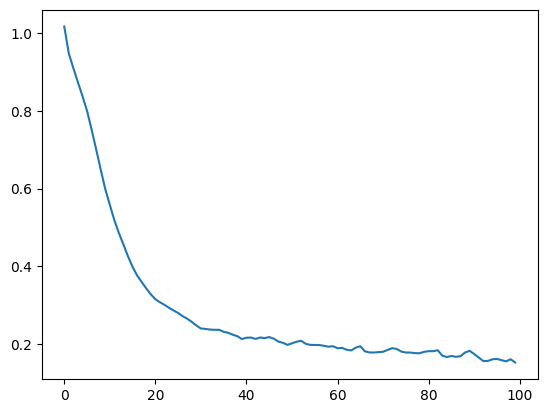

In [12]:
plt.plot(history.history['val_loss'])